# Week 5 Overview
This week we will cover directed acyclic graphs (DAGs). DAGs visually represent causal relationships using nodes and arrows, helping us distinguish correlation from causation. Through examples, including one involving deer, flowers, and pesticides, we see how confounders and colliders affect our interpretation of data. DAGs also introduce tools like front door paths and placebo tests, which support more accurate causal analysis.

## Learning Objectives 
At the end of this week, you will be able to: 
- Draw directed acyclic graphs/causal diagrams to describe a particular situation. 
- Identify front door and back door paths in causal diagrams. 
- Identify confounders in causal diagrams. 
- Identify colliders in causal diagrams. 
- Draw causal diagrams that use time to permit feedback loops. 

# Topic 1: Causal Diagrams
What if removing weeds from your garden also made deer disappear? Strange as it sounds, relationships like these are everywhere in data — but spotting what's truly causing what isn’t always obvious. This week, we explore DAGs, a powerful tool for making sense of tangled relationships. You’ll learn how DAGs use simple visuals — nodes and arrows — to map causality, uncover hidden confounders and colliders, and apply techniques like front-door paths and placebo tests to get closer to the underlying causal structure. 

## Learning Objectives 
- Draw directed acyclic graphs/causal diagrams to describe a particular situation. 
- Identify front door and back door paths in causal diagrams. 
- Identify confounders in causal diagrams. 
- Identify colliders in causal diagrams. 
- Draw causal diagrams that use time to permit feedback loops. 


## 1.1 Lesson: Directed Acyclic Graphs
Lets say we have a population of flowers that are being eaten by the deer. To help the flowers thrive, we're thinking about reducing the deer population. But before taking action, we want to understand the causal effect of the deer on the flowers.

If that were the whole story, we'd just look at some data from different ecosystems with deer and flowers, compare how many deer and flowers there are, and use the correlation between them as a guide. But,  there is more to it:
- Lets say that people sometimes spray pesticides on the environment, and these particular pesticides are bad for deer, they're also bad for flowers. (I'm sure there are some pesticides that would be good for flowers by killing the weeds only, but this pesticide is bad for flowers.)
- So now we have a **confounder**, pesticides affect both deer and flowers. That means if we ignore pesticide use, we might wrongly blame deer for flower loss that was actually caused by chemicals.
- To help visualize this, we can use something called a **Directed Acyclic Graph**, or **DAG**. It's a diagram that maps out causal relationships between variables, which we call **nodes** using arrows.
    - The word *directed* means that the arrows point in one direction at a time from cause to effect.
    - The word *acyclic* means that you can't follow the arrows in a loop and get back to where you started.
    - The word *graph* means that the picture is made of nodes and arrows.

The DAG shows arrows from pesticides to both deer and flowers and another arrow from deer to flowers. This helps us understand the real structure behind the data and how to avoid drawing the wrong conclusions.

In this scenario, deer are our treatment and flowers are the outcome. Maybe we're considering releasing deer into an area to control vegetation, including flowers. Or maybe we're trying to reduce the deer population to protect the flowers. Either way, we want to understand how deer actually affect flower growth. But there's a twist, pesticides:
- Pesticides act as a **confounder**, a hidden third factor that influences both the treatment, deer, and the outcome, flowers. Specifically, pesticides reduce the deer population, perhaps by poisoning their food or making the environment less hospitable. And they also harm flowers directly.

So we get something like this:
- More pesticides mean fewer deer and fewer flowers.
- Fewer pesticides means more deer and more flowers.

At first glance, this creates a positive correlation between deer and flowers. When there are more deer, there also tend to be more flowers. But this is not because deer help flowers grow, in fact, they probably eat them. Instead, deer and flowers are both responding to changes in pesticide use. In other words, part of the correlation between deer and flowers is spurious. It's not a sign of a causal relationship, they're moving together not just because one causes the other, but because they're both being pushed around by the same third factor, pesticides. This is exactly why we need to be careful when interpreting raw correlations in data. Without accounting for confounders like pesticides, we might completely misread the situation.

### Directed Acyclic Graphs
As discussed in the video, we cannot perform a causal reasoning analysis if we do not know the causal relationship between our features. Thus, we can tell from the features that $X$ is correlated with $Y$, $Y$ with $X$, and $X$ with $Z$, but we can’t tell if there is a *causal* relationship there. That would be an important thing to know. 

Recall the example: suppose the deer population is correlated with the flower population (deer eat flowers), and pesticide spraying both kills this kind of flower, and also keeps deer away. Then deer, pesticides, and flowers are all correlated with each other. We would also expect that the negative correlation between deer and flowers in our data appears weaker than the underlying causal relationship, because the pesticides create a more positive correlation between deer and flowers (by decreasing both deer and flowers at the same time). 

Thus:

**Table 1:** *Without Pesticides*
| Deer | Flowers |
| :--- | :--- |
| 2 | 5 |
| 3 | 4 |
| 4 | 3 |
| 5 | 2 |

**Table 2:** *With Pesticides*
| Deer | Flowers | Pesticides |
| :--- | :--- | :--- |
| 0 | 3 | 2 |
| 3 | 4 | 0 |
| 2 | 1 | 2 |
| 5 | 2 | 0 |

In this thought experiment we have:
-  `[2, 3, 4, 5]` `deer`, 
- `[5, 4, 3, 2]`  `flowers`, 
- `pesticides` were subtracted from both `deer` and `flowers` 

This dramatically weakens the negative correlation between `deer` and `flowers`. 

For instance, if you look at the middle two rows alone, there is actually a positive correction. (You can check that the overall correlation goes from -1 to -0.12 by e.g. calling np.corrcoef([0, 3, 2, 5], [3, 4, 1, 2]) in Python. 

A directed acyclic graph shows the causal relationship here. We’d see that deer cause flowers, while pesticides cause both: 

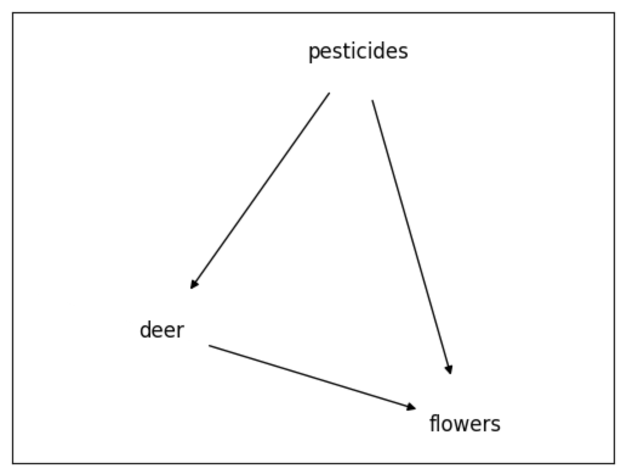

### Components of Directed Acyclic Graphs
Let’s dive deeper into the meaning of directed acyclic graphs:  

#### “Graph”
The word “graph” in “directed acyclic graph” means that the picture shows some nodes (pesticides, deer, flowers) and edges (depicting relationships). 

#### “Directed” 
The word “directed” means that the lines between the nodes are arrows that show causal relationships. 

#### “Acyclic” 
The word “acyclic” means that the arrows point in one direction at a time, and there are no “cycles” of arrows. That is, you cannot follow the arrows to go in a circle and get back to where you started. This implies that at least one node (a “source”) has no incoming arrows, and at least one (a “sink”) has no outgoing arrows. Moreover, every node can be reached by following arrows starting from a source. In the above diagram, “pesticides” are a source, and “flowers” are a sink. The treatment (deer) is not a source in this case because pesticides cause it. (Likewise, an instrumental variable will cause the treatment.) 


## 1.2 Lesson: What the Arrow Means

### What Type of Relationship Is Implied by the Arrow?
The intent is that if a node $A$ has arrows pointing to it from nodes $B$ and $C$ (and no other nodes), then $A$ can be written as some function of $B$, $C$, and noise $A \; = \; f(B, C, \epsilon)$, where $\epsilon$ is uncorrelated with $B$ and $C$. However, the relationship *usually* is not just any relationship. 

Thus, if there is an arrow from treatment $X$ to outcome $Y$, it is unlikely that something horribly complicated like:
$$ Y \; = \; \frac{\exp(\beta_0 + _1 X^2 + \frac{\beta_2}{X})}{\beta_3 + \ln(X + \epsilon)}$$

Is the intended relationship ($\exp$ means an exponential, that is, $e$ to a power). Usually, what’s intended is something simpler and/or more linear. 

In the simplest case, this diagram is suggesting a **linear relationship** for each arrow. Thus:

$ \text{flowers} \; = \; \beta_{F0} + \beta_{F1} \cdot \text{deer} + \beta_{F2} \cdot \text{pesticides} + \epsilon_F$

$ \text{deer} \; = \; \beta_{D0} + \beta_{D1} \cdot \text{pesticides} + \epsilon_D$

- $\varepsilon_F$ and $\varepsilon_D$  are noise terms that are uncorrelated with the other variables in their respective equations. 
- However, $\varepsilon_F$ is correlated with $F$ and $\varepsilon_D$ is correlated with $D$. 

In the simple case,$\varepsilon_F$ and $\varepsilon_D$ also have a standard deviation that does not depend on the other variables. (They are not **heteroskedastic**.) 

That is, if we condition $\varepsilon_F$ on particular values of deer and pesticides, looking at the error term only for those samples with those specific values, then $\varepsilon_F$ has some standard deviation. This standard deviation may be different for different values of deer and pesticides. If so, the error is heteroskedastic.

It is also possible that the diagram indicates some sort of polynomial relationship:

$ \text{flowers} \; = \; \beta_{F0} + \beta_{F1} \cdot \text{deer} + \beta_{F2} \cdot \text{pesticides} + \beta_{F3} \cdot \text{deer}^2 + \varepsilon_F$

$ \text{deer} \; = \; \beta_{D0} + \beta_{D1} \cdot \text{pesticides} + \beta_{D1} \cdot \text{pesticides}^3 + \varepsilon_D$

It is even possible that there is a nonlinear relationship (nonlinear in the betas), such as a logistic function: 

$ \text{deer} \; = \; \frac{1}{1 + \exp(-\beta_{D0} + \beta_{D1} \cdot \text{pesticides})} + \varepsilon_D$

This would be useful if there are always exactly 0 or 1 deer, and we want to compute the probability of there being 1 deer. 

(**Note:** the polynomial above that contains $\text{pesticides}^3$ is nonlinear in `pesticides`, but we don't call it nonlinear regression)

To be called nonlinear regression, it must be nonlinear in the coefficients $\beta$.

Finally, we might have linear interaction effects, like: 

$\text{flowers} \; = \; \beta_{F0} + \beta_{F1} \cdot \text{deer} + \beta_{F2} \cdot \text{pesticides} + \beta_{F3} \cdot \text{deer} \cdot \text{pesticides} + \varepsilon_{F}$

DAGs don’t always specify whether there are interaction effects, just as they do not specify that there are polynomial terms. (If there is a term in $A$ and $B$ affecting $C$, there may or may not be a term in $A \times B$.) 

Even more so than with polynomial terms, we usually should not include interaction terms in our models unless we have reason to believe that they are there because they require a lot of data. 

### Front Door Paths
A front door path, in the example, is the causal relationship where “deer cause flowers.” (Actually, deer cause flowers inversely — the more deer, the less flowers — that’s okay.) This path is a front door path because it consists of a sequence or chain of arrows pointing from treatment to outcome — in this case, a sequence of one arrow. Importantly, it is not a confounding path (there is no node with two outgoing arrows) and also contains no collider (a node with two incoming arrows). 

### Confounders 
In the deer/flowers/pesticides example, the pesticides are a **confounder**. One way for something (like the pesticides in this case) to be a confounder is that they cause both the deer and the flowers. In this case, the connection is that high pesticides subtract from both. Simply being *correlated* with deer and flowers is not enough to be a confounder; as we will note below, a collider variable can be correlated with both yet not cause either. 

A **confounding path** is a path from treatment to outcome that: 
- (1) contains at least one node with two outgoing arrows, 
- (2) does not contain any node (a collider) with two incoming arrows. 

If we control for *any* one variable on a confounding path (except for the treatment and outcome themselves), we can control for that path. 

A variable on a confounding path is a **confounder**, even if it does not have two outgoing arrows. 



## 1.3 Lesson: Colliders

### Directed Acyclic Graphs — Colliders

### Colliders
A **collider** is a node on a path that has two incoming arrows. We must *not* control for a collider. 

To see this, consider what happens in a simple linear case where there is one collider between treatment and outcome:

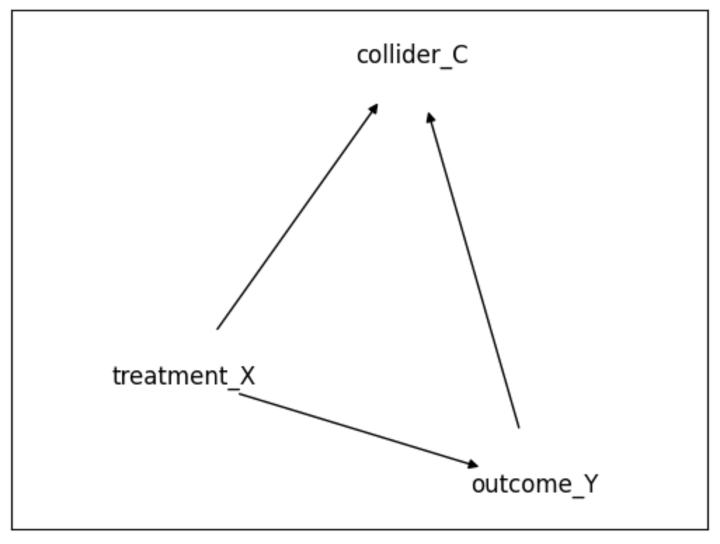

$$ \text{collider} \; = \; \beta_1 X + \beta_2 Y + \varepsilon_C$$

And there is also a direct relationship from treatment to outcome:

$$ Y \; = \; \beta_3 X + \varepsilon_Y $$

Then, if we try to control for the collider by putting Y by itself on one side of the equation, we get: 

$$ Y \; = \; \left( \frac{-\beta_1}{\beta_2} \right) X + \left( \frac{1}{\beta_2} \right) \text{collider} -  \left( \frac{1}{\beta_2} \right) \varepsilon_c $$

(this is already not quite right, because now the error term ($\varepsilon_C$) is correlated with "collider", and the noise shouldn't be correlated with the independent variables; this is perhaps unavoidable because Y isn't *really* caused by $X$ and "collider.")

Now, this gives a different coefficient for the relationship between $Y$ and $X$, which is $ - \frac{\beta_1}{\beta_2}$ instead of $\beta_3$. (It may even be that this coefficient is negative, whereas $\beta_3$ is positive.) in any case, there is no reason for them to be the same. So, this seems to suggest that controlling for the collider will lead to problems, although putting $Y$ by itself in this manner does not entirely make sense. 

### Placebo Tests
A **placebo test** means that we close all paths, including front door paths, and then test for a correlation between treatment and outcome. 
- There shouldn’t be a correlation. If there is, it’s likely that we are missing a path in the diagram — there is some confounder that is not represented in our dataset. 
- Recall that in causal analysis, we must use domain knowledge to understand the relationships between variables and discern which relationships are likely to be causal and which are merely correlative. 
- However, it is possible to check manually using a placebo test. It’s not perfect, but it provides a check that our domain knowledge was accurate.

### Time and Cycles
A directed acyclic graph has no cycles - so what happens if $A$ causes $B$, but $B$ also has an effect on $A$? 

For example, what if high visitor rates to a carnival cause vendors to increase their prices, but this, in turn, decreases the visitor rates?
- We might be tempted to write this as $A \leftrightarrow B $ But that doesn’t work because it would be cyclic. 
- Instead, what we want to say is that the value of $A$ at the time $t = 1$ causes the value of $B$ as the time $t = 2$, and
- the value of $B$ at the time $t = 1$ causes the value of $A$ at the time $t = 2$. So, overall:

$A_t \rightarrow B_{t+ 1}$

$ B_t \rightarrow A_{t+ 1}$

In this way, there are no cycles; just four nodes in our graph (with, in this case, two disconnected effects). 


### Required Resources
The following resources are required for your learning this week. Make sure you review everything linked below, as you may be tested on the concepts in an upcoming Knowledge Check or Quiz. 

#### Reading | Huntington-Klein, N. (2022, January 5). The effect: An introduction to research design and causality. Chapman & Hall. 

Read the following chapters: 
- Chapter 10: Treatment Effects 
- Chapter 11: Causality with Less Modeling 

In all cases, do the entire reading. If for any reason you do not have time to do the entire reading, read a given chapter from the beginning and get as far as you can.  







## Treatment Effects
**Heterogeneous Treatment Effect:** Whenever we have a treatment effect that varies across a population (i.e., all the time), we can call that a heterogeneous treatment effect.
- We can actually think of each individual has having their *own* treatment effect. 
- There are also variation in the treatment effect *outside* what you can see in the sample. 

So what can we make of the idea that we have heterogeneous treatment effects?
- One thing that we can try to do is to estimate a *distribution* of effects and try to predict, for a given person with a given set of attributes, what their effect might be.

So in this chapter, we will instead focus on the other thing we can do with the concept of heterogeneous treatment effects: ask “if effects are so heterogeneous, then what exactly are we identifying anyway?”

### 10.2 | Different Averages
What we have is the concept that each person has their own treatment effect. That means that we can think of there as being a *distribution* of treatment effects.
- This works like any other distribution of a variable, with the only difference being that we don't actually observe the treatment effects in our data. 
- Like any other typical distribution, we can describe the features of it, like the mean, or **average treatment effect**. 
- The **Average Treatment Effect**, often referred to as the **ATE** has an obvious interpretation - if you impose the treatment on everyone, then this is the change the average individual will see. 
- Estimating the ATE is not always feasible, and in some cases is not even desirable. 

#### The two main treatment effect averages to care about: 
1. Treatment effect averages where we only count the treatment effects of *some* people but not others. (treatment effect averages conditional on something)
2. Treatement effect averages where we count everyone, but count some individuals more than others.

___

What happens when we isolate the average effect for just a certain group of people? And how might we do it?

To answer this question, let’s make some fake data. This will be handy because it will allow us to see what is usually invisible - what the treatment effect is for each person.

Once we have our fake data, we will be able to: 
- (a) discuss how we can take an average of just some of the people, and 
- (b) give an example of how we could design a study to get that average.

<br>

| Name | Gender | Untreated Outcome | Treated Outcome | Treatment Effect |
| :--- | :--- | :--- | :--- | :--- |
| Alfred | Male | 1 | 2 | 1 |
| Brianna | Female | 1 | 5 | 4 |
| Chizue | Female | 2 | 5 | 3 |
| Diego | Male | 2 | 4 | 2 |

- These 4 individuals have different treatment effects. 
- This table just describes what we *would see under treatment or no treatment*. 
- If nobody were treated, then Alfred and Brianna would have an outcome of 1, and Chizue and Diego would have an outcome of 2.
- With treatment, Alfred jumps by 1, Biranna by 4, Chizue by 3, and Diego by 2.
- The **average treatment effect** is $(1 + 4 + 3 + 2) \; / \; 2 \; = \; 2.5$

One common way we get an average effect for only a certain group is to literally pick a certain group. 
| Name | Treated | Outcome |
| :--- | :--- | :--- |
| Alfreds | Treated | 2 |
| Alfreds | Untreated | 1 |
| Diegos | Treated | 4 |
| Diegos | Untreated | 2 |

Then, using Table 10.2, we calculate the effect:
- We find that the treated people on average had an outcome of (2 + 4) / 2 = 3, 
- the untreated had (1 + 2) / 2 = 1.5,
- conclude that the treatment has an effect of  3 - 1.5 = 1.5. 
- This is the exact same as the average of Alfred’s and Diego’s treatment effect, (1 + 2)/2 - 1.5. 

So we have an average treatment effect *among men*, or an average treatment effect *conditional on being a man*.

___
Another common way in which the average effect is taken among just one group is based on who gets treated. 
- Based on the research design and estimation method, we might end up with the **average treatment on the treated** (**ATT**)
- the **average treatment on the untreated** (**ATUT**), which averages the treatment effects among those who actually got treated (or not).
    - But one way it works is that you take what you know about how treatment varies, and what predicts who has big or small treatment effects, and then use that to predict what sort of effect the untreated group would see.
    - For example, say we get a sample of: 
        - 1,000 Alfreds,
        - 1,000 Briannas, 
        - where 400 Alfreds and 600 Briannas have been assigned to treatment on a basically random basis, leaving 600 Alfreds and 400 Briannas untreated.
    - The AUT will be (400 * 2 + 600 * 5)/ 1000 = 3.8
    - The ATUT will be 1. 
    - However, we can run our analysis an extra two times, once just on Alfreds and once just on Briannas, and find that the average treatment effect conditional on being Alfred appears to be 1, and the average treatment effect conditional on being Brianna appears to be 4. 
    - Since we know that there are 600 untreated Alfreds and 400 untreated Briannas, we can work out that the average treatment on the untreated is (600 * 1 + 400 * 4) / 1000 = 2.2 ATUT!
___

One other way in which a treatment effect can focus on a particular group is with the **marginal treatment effect**, or the effect of the treatment on a person who is just on the margin of either being treated or not treated. This is a handy concept if the question you’re trying to answer is “should we treat more people?”
___

Instead of focusing our average just on a group of people, what if we include everyone, but perhaps weight some people more than others? We can generically think of these as being called “**weighted average treatment effects**.”
- In general the WATE is a lot like a mean 


### 10.5 | Treatment Effect Glossary
We’ve talked about a whole lot of different kinds of treatment effects. Let’s remind ourselves what they are.
- **Average Treatment Effect:** The average treatment effect across the population.
- **Average Treatment on the Treated:** The average treatment effect among those who actually received the treatment in your study.
- **Average Treatment on the Untreated:** The average treatment effect among those who did not actually receive the treatment in your study.
- **Conditional Average Treatment Effect:**. The average treatment effect among those with certain values of certain variables (for example, the average treatment effect among women).
- **Heterogeneous Treatment Effect:** A treatment effect that differs from individual to individual.
- **Intent-to-Treat:** The average treatment effect of assigning treatment, in a context where not everyone who is assigned to receive treatment receives it (and maybe some people not assigned to treatment get it anyway).
- **Local Average Treatment Effect:** A weighted average treatment effect where the weights are based on how much more treatment an individual would get if assigned to treatment than if they weren’t assigned to treatment.
- **Marginal Treatment Effect:** The treatment effect of the next individual that would be treated if treatment were expanded.
- **Weighted Average Treatment Effect:** A treatment effect average where each individual’s treatment effect is weighted differently.
- **Variance-Weighted Average Treatment Effect:** A treatment effect average where each individual’s treatment effect is weighted based on how much variation there is in their treatment variable, after closing back doors.


Knowledge Check: Causal Diagrams
1. A ___ can be any node on a confounding path:
- Confounder; A confounding path is a path from treatment to outcome that has (1) no colliders and (2) at least one node with two outgoing arrows. (If there is no node with two outgoing arrows, so that the arrows go straight from treatment to outcome, it’s a front door path.)
2. A ___ shows the relationships between many nodes (variables)
- Directed Acyclic Graph
- A directed acyclic graph is made of nodes (variables) and the causal relationships between them.
3. We should never control for a ___ because it will cause spurious correlations:
- Collider
- A collider is a node that is caused by two other nodes — a node where two arrowheads meet. It doesn’t cause either of them, so controlling for it is not necessary and could cause problems.